In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import add
_c = pd.read_csv('color.csv')['color'].values


### Sensitivity: Budget Importance

In [11]:
def superscript_text(text):
    superscript_map = {
        '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
        '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
        'a': 'ᵃ', 'b': 'ᵇ', 'c': 'ᶜ', 'd': 'ᵈ', 'e': 'ᵉ',
        'f': 'ᶠ', 'g': 'ᵍ', 'h': 'ʰ', 'i': 'ⁱ', 'j': 'ʲ',
        'k': 'ᵏ', 'l': 'ˡ', 'm': 'ᵐ', 'n': 'ⁿ', 'o': 'ᵒ',
        'p': 'ᵖ', 'q': 'ᵠ', 'r': 'ʳ', 's': 'ˢ', 't': 'ᵗ',
        'u': 'ᵘ', 'v': 'ᵛ', 'w': 'ʷ', 'x': 'ˣ', 'y': 'ʸ',
        'z': 'ᶻ', '+': '⁺', '-': '⁻', '=': '⁼', '(': '⁽',
        ')': '⁾', '/': '⁄', ' ': ' ', 'R': ''
    }
    return ''.join(superscript_map.get(char, char) for char in text.lower())
gamma_symbol = '\u03B3'

In [107]:
j = 1
com_names = ['Dove Springs', 'Sunnyside', 'Rogers Washington']
com = com_names[j]
color = ['#8FAADC', '#F4B183', '#209665'][j]
data = pd.read_csv(f'ES-PV-DRP {com}-report.csv')
bm = data['Settings'] == 'Budget'
vm = data['Settings'] == 'VoLL'
tm = data['Settings'] == 'Trans'
ty = data['Settings'] == 'Year'
em = data['Settings'] == 'Eprice'
pvm = data['Settings'] == 'PVprice'
RM1, RM2, RM3, RM4 = 'Impact Endurance', 'Sustained Access', 'Demand Assurance', 'Peak Assurance'

### Investment Distribution

OSError: [Errno 22] Invalid argument: "<class 'type'> Dove Springs-report.csv"

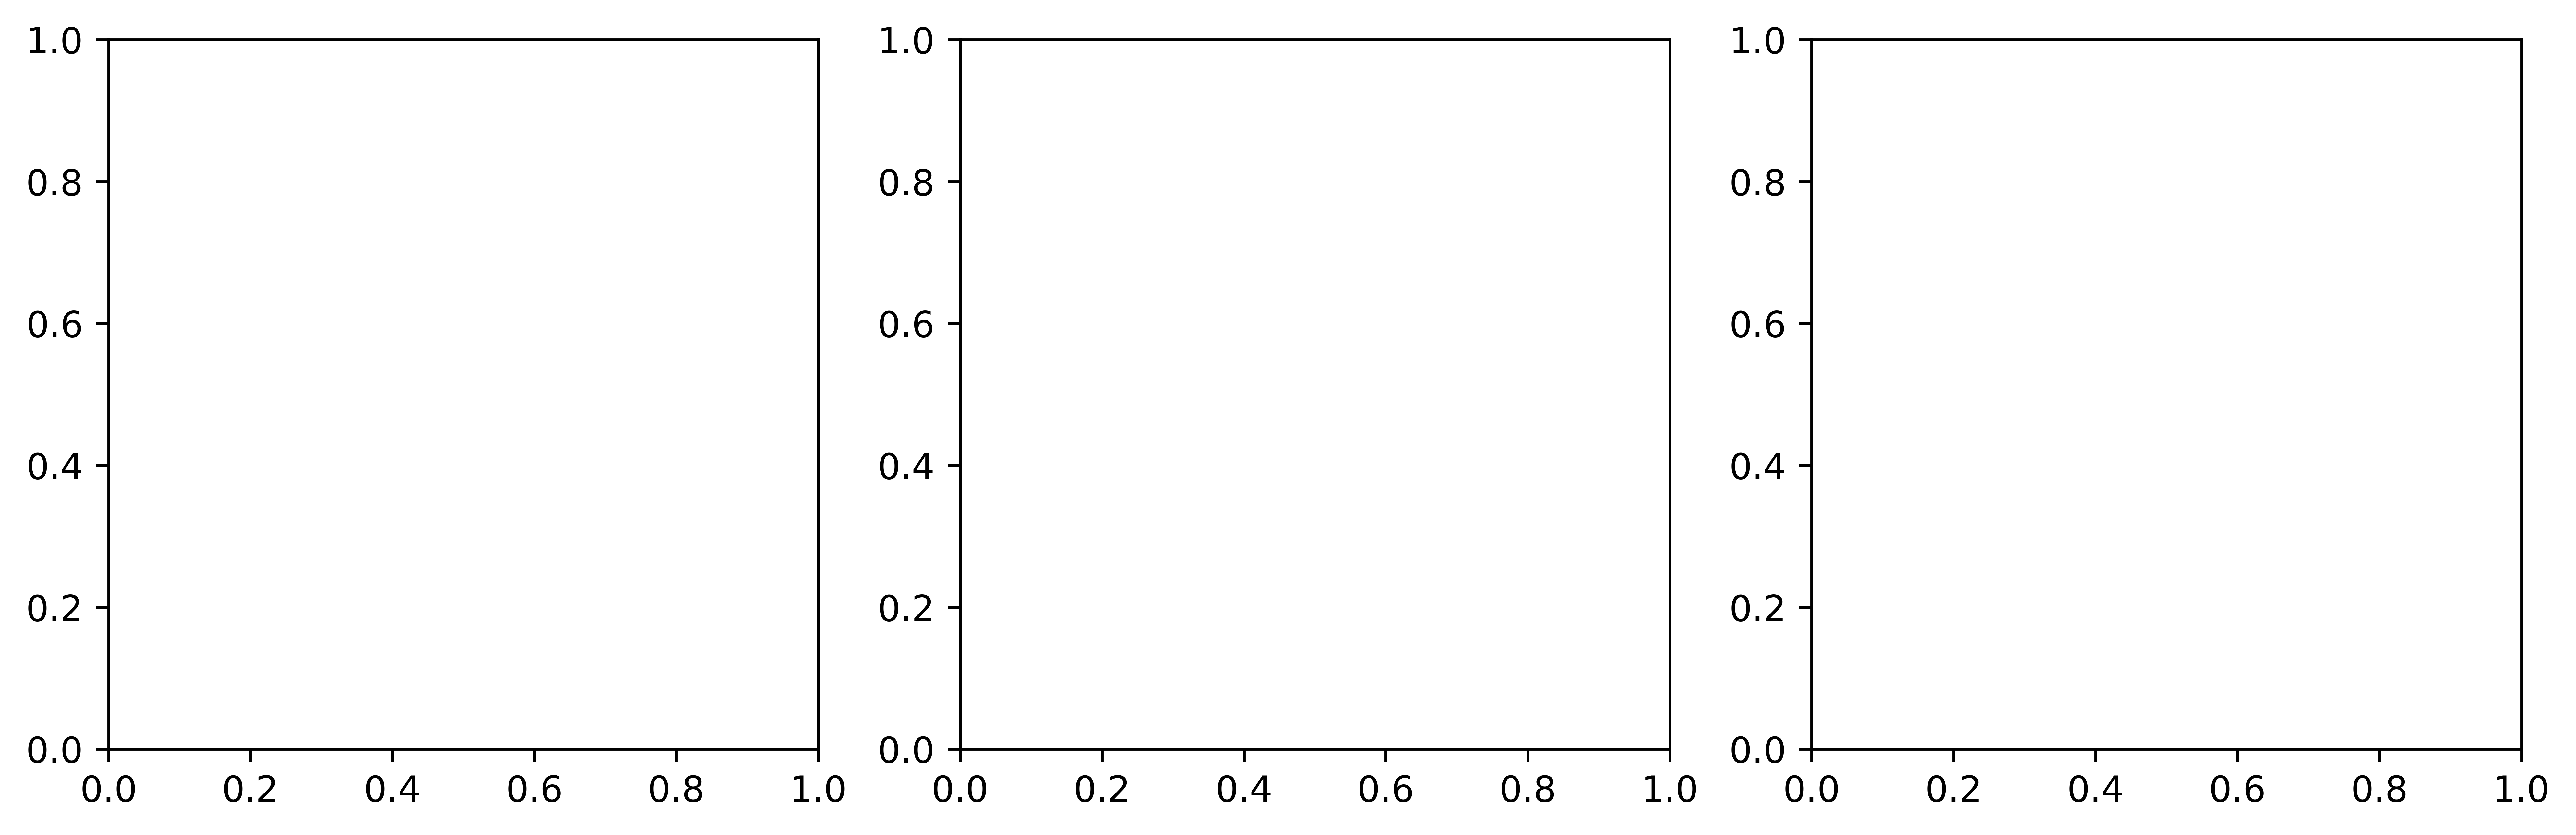

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), subplot_kw=dict(aspect="equal"), dpi=800)

recipe = ['ES', 'PV', 'DG']
for r in range(3):
    pie_data = pd.read_csv(f'{type} {com_names[r]}-report.csv')
    values = [300*(pie_data['ES1'].iloc[0]+pie_data['ES2'].iloc[0]), 
              2780*(pie_data['PV1'].iloc[0]+pie_data['PV2'].iloc[0])/4, 
              400*(pie_data['DG1'].iloc[0]+pie_data['DG2'].iloc[0])]
    colors = [_c[1], _c[0], _c[7]]
    wedges, texts, autotexts = ax[r].pie(values, wedgeprops=dict(width=0.6), autopct='%1.1f%%', colors=colors)
    
    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.5)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    for autotext in autotexts:
        autotext.set_color('white')  # Change 'black' to the desired font color
        
    ax[r].set_title(com_names[r])

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/3. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax[r].annotate(recipe[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.1*y),
                    horizontalalignment=horizontalalignment, **kw)
plt.savefig(f'../IMG/device share {com}.jpg', bbox_inches='tight')

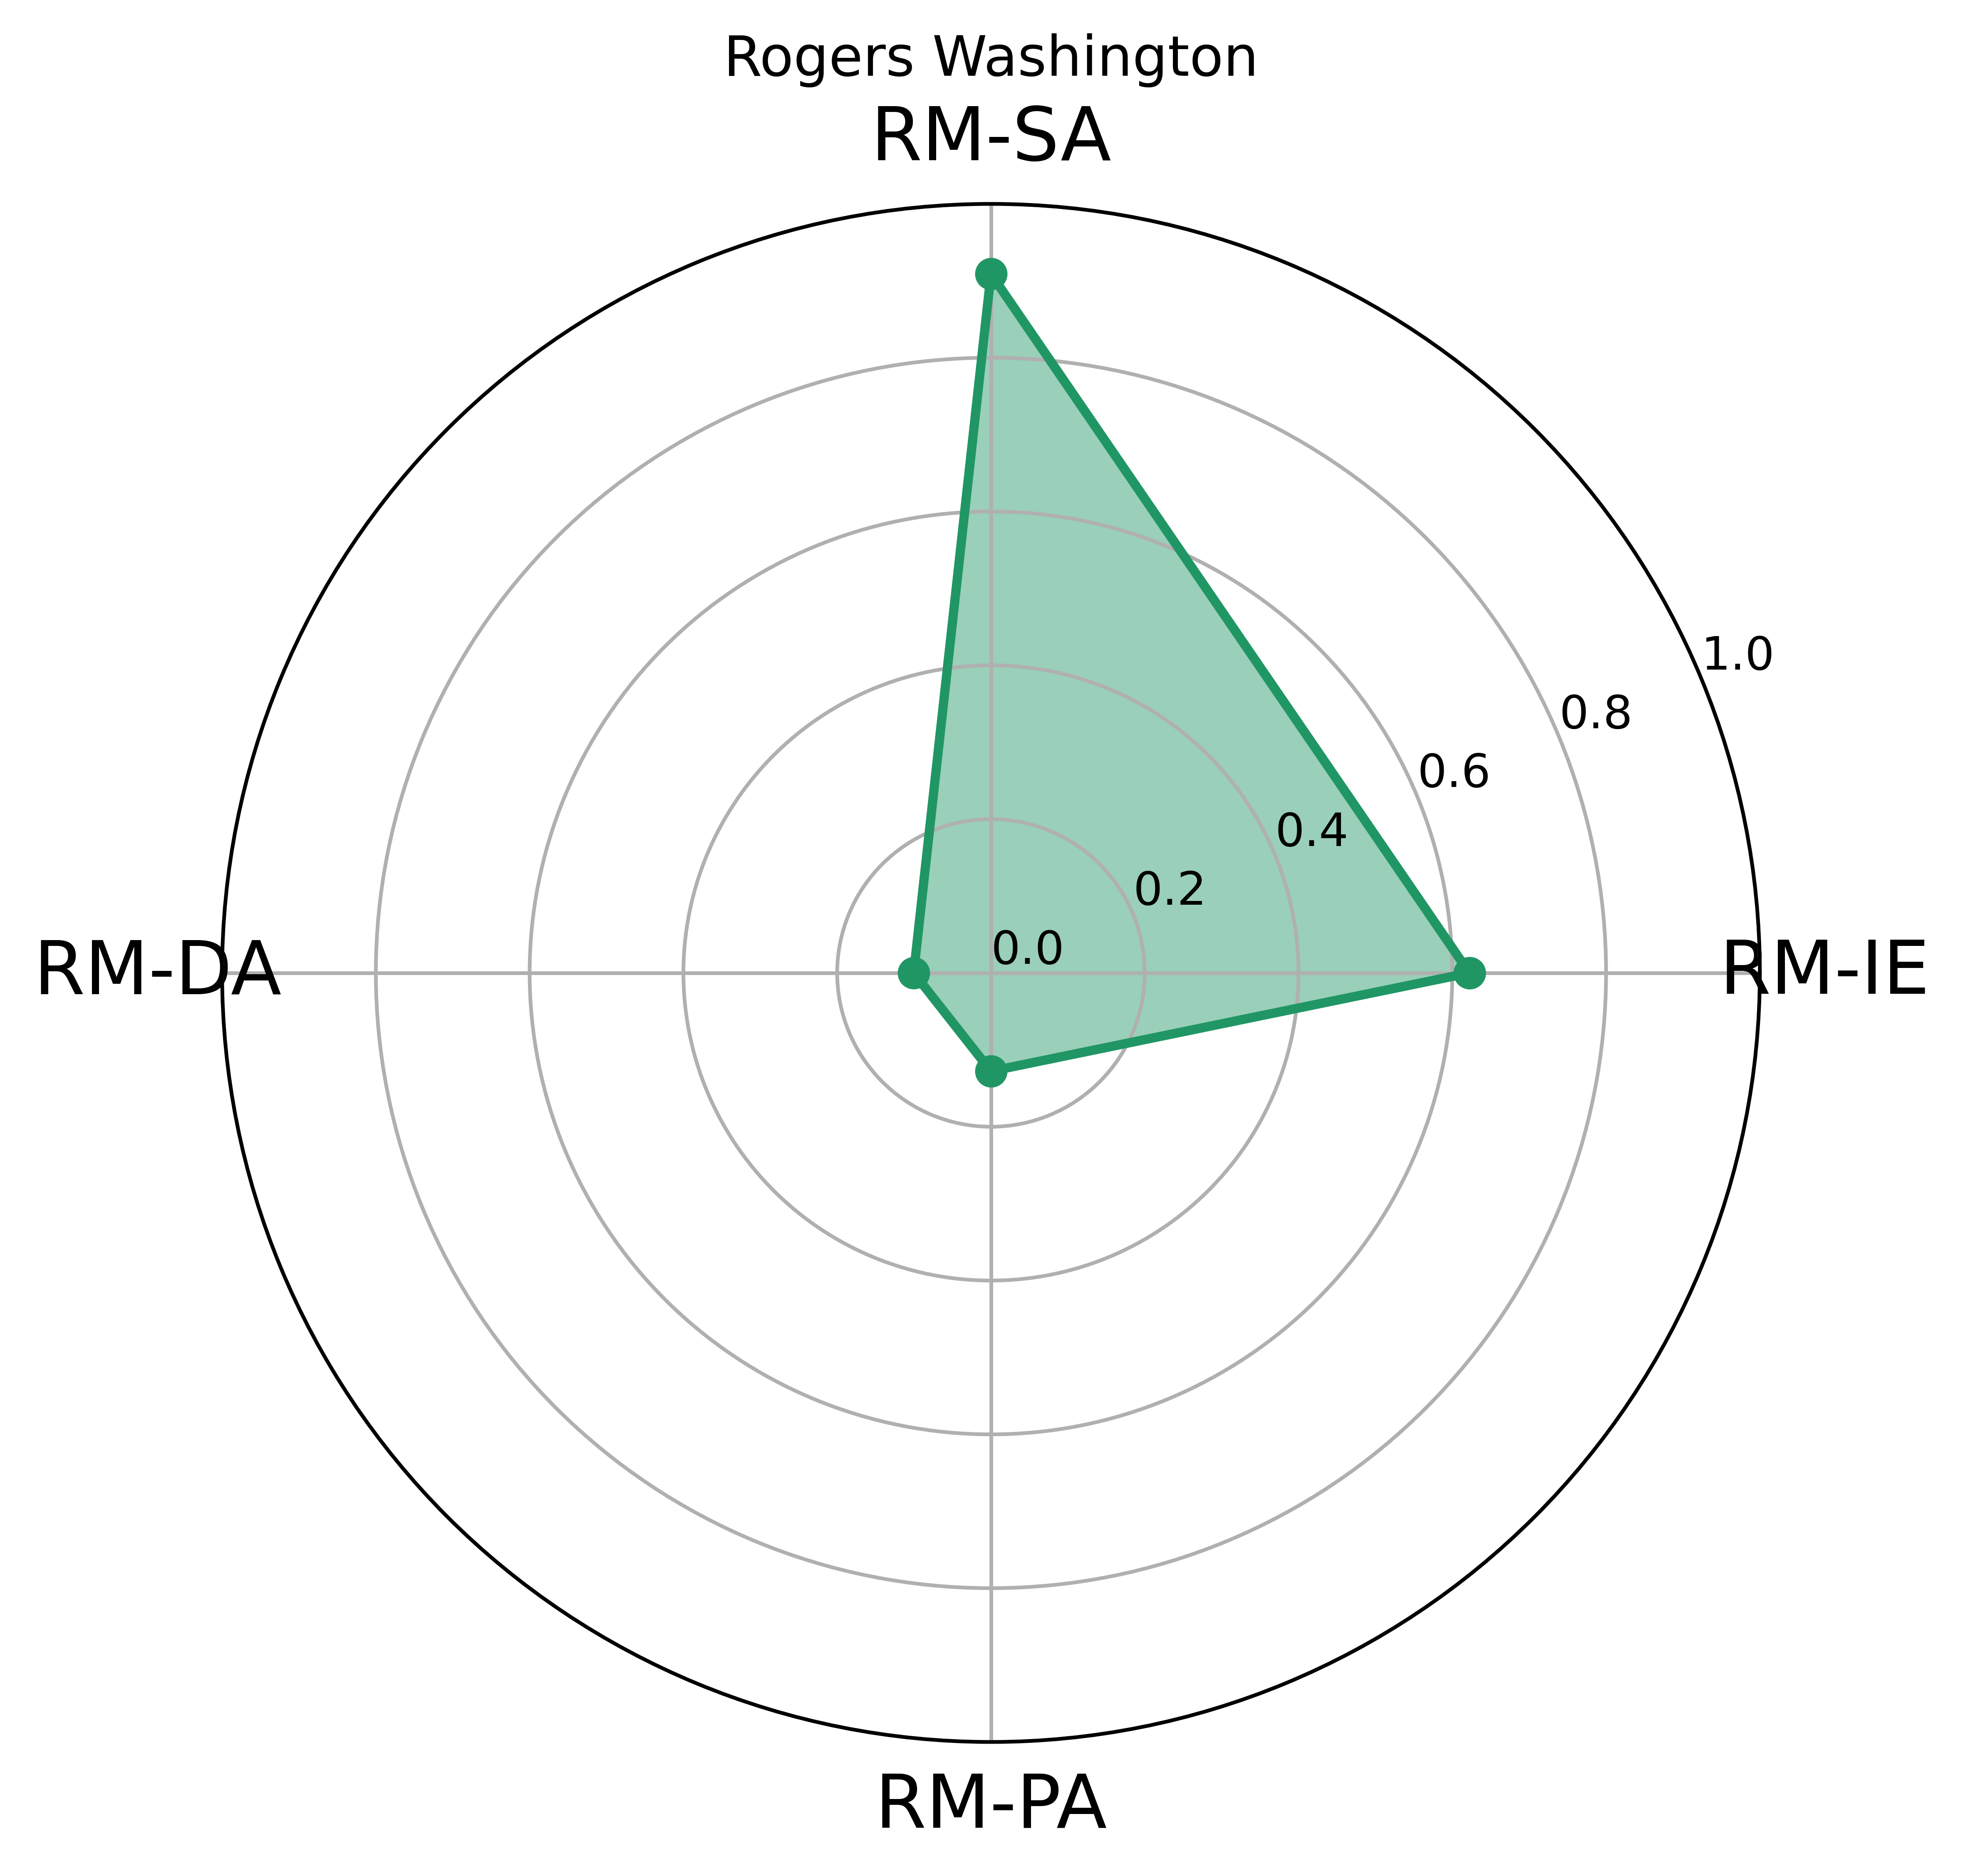

In [149]:
# Define the labels for each metric
labels = ['RM-IE', 'RM-SA', 'RM-DA', 'RM-PA']

# Define the values for each metric (example values)
values = [data[RM1].iloc[0], data[RM2].iloc[0], data[RM3].iloc[0], data[RM4].iloc[0]]

# Calculate the angle for each metric
angles = np.linspace(0, 2 * np.pi, 4, endpoint=False).tolist()

# Make the plot close to a circle
values += values[:1]
angles += angles[:1]

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=800)
ax.fill(angles, values, color=color, alpha=0.45)
ax.plot(angles, values, marker='o', color=color, linewidth=2)  # Line plot for better visualization
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])  # Remove radial labels

# Add labels with increased font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=16, color='black')  # Set font size to 12

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add a title
plt.title(f'{com}')

# Show the plot
plt.savefig(f'../IMG/{com}-Resilience_Metrics.jpg', bbox_inches='tight')

### Sensitivity Chart

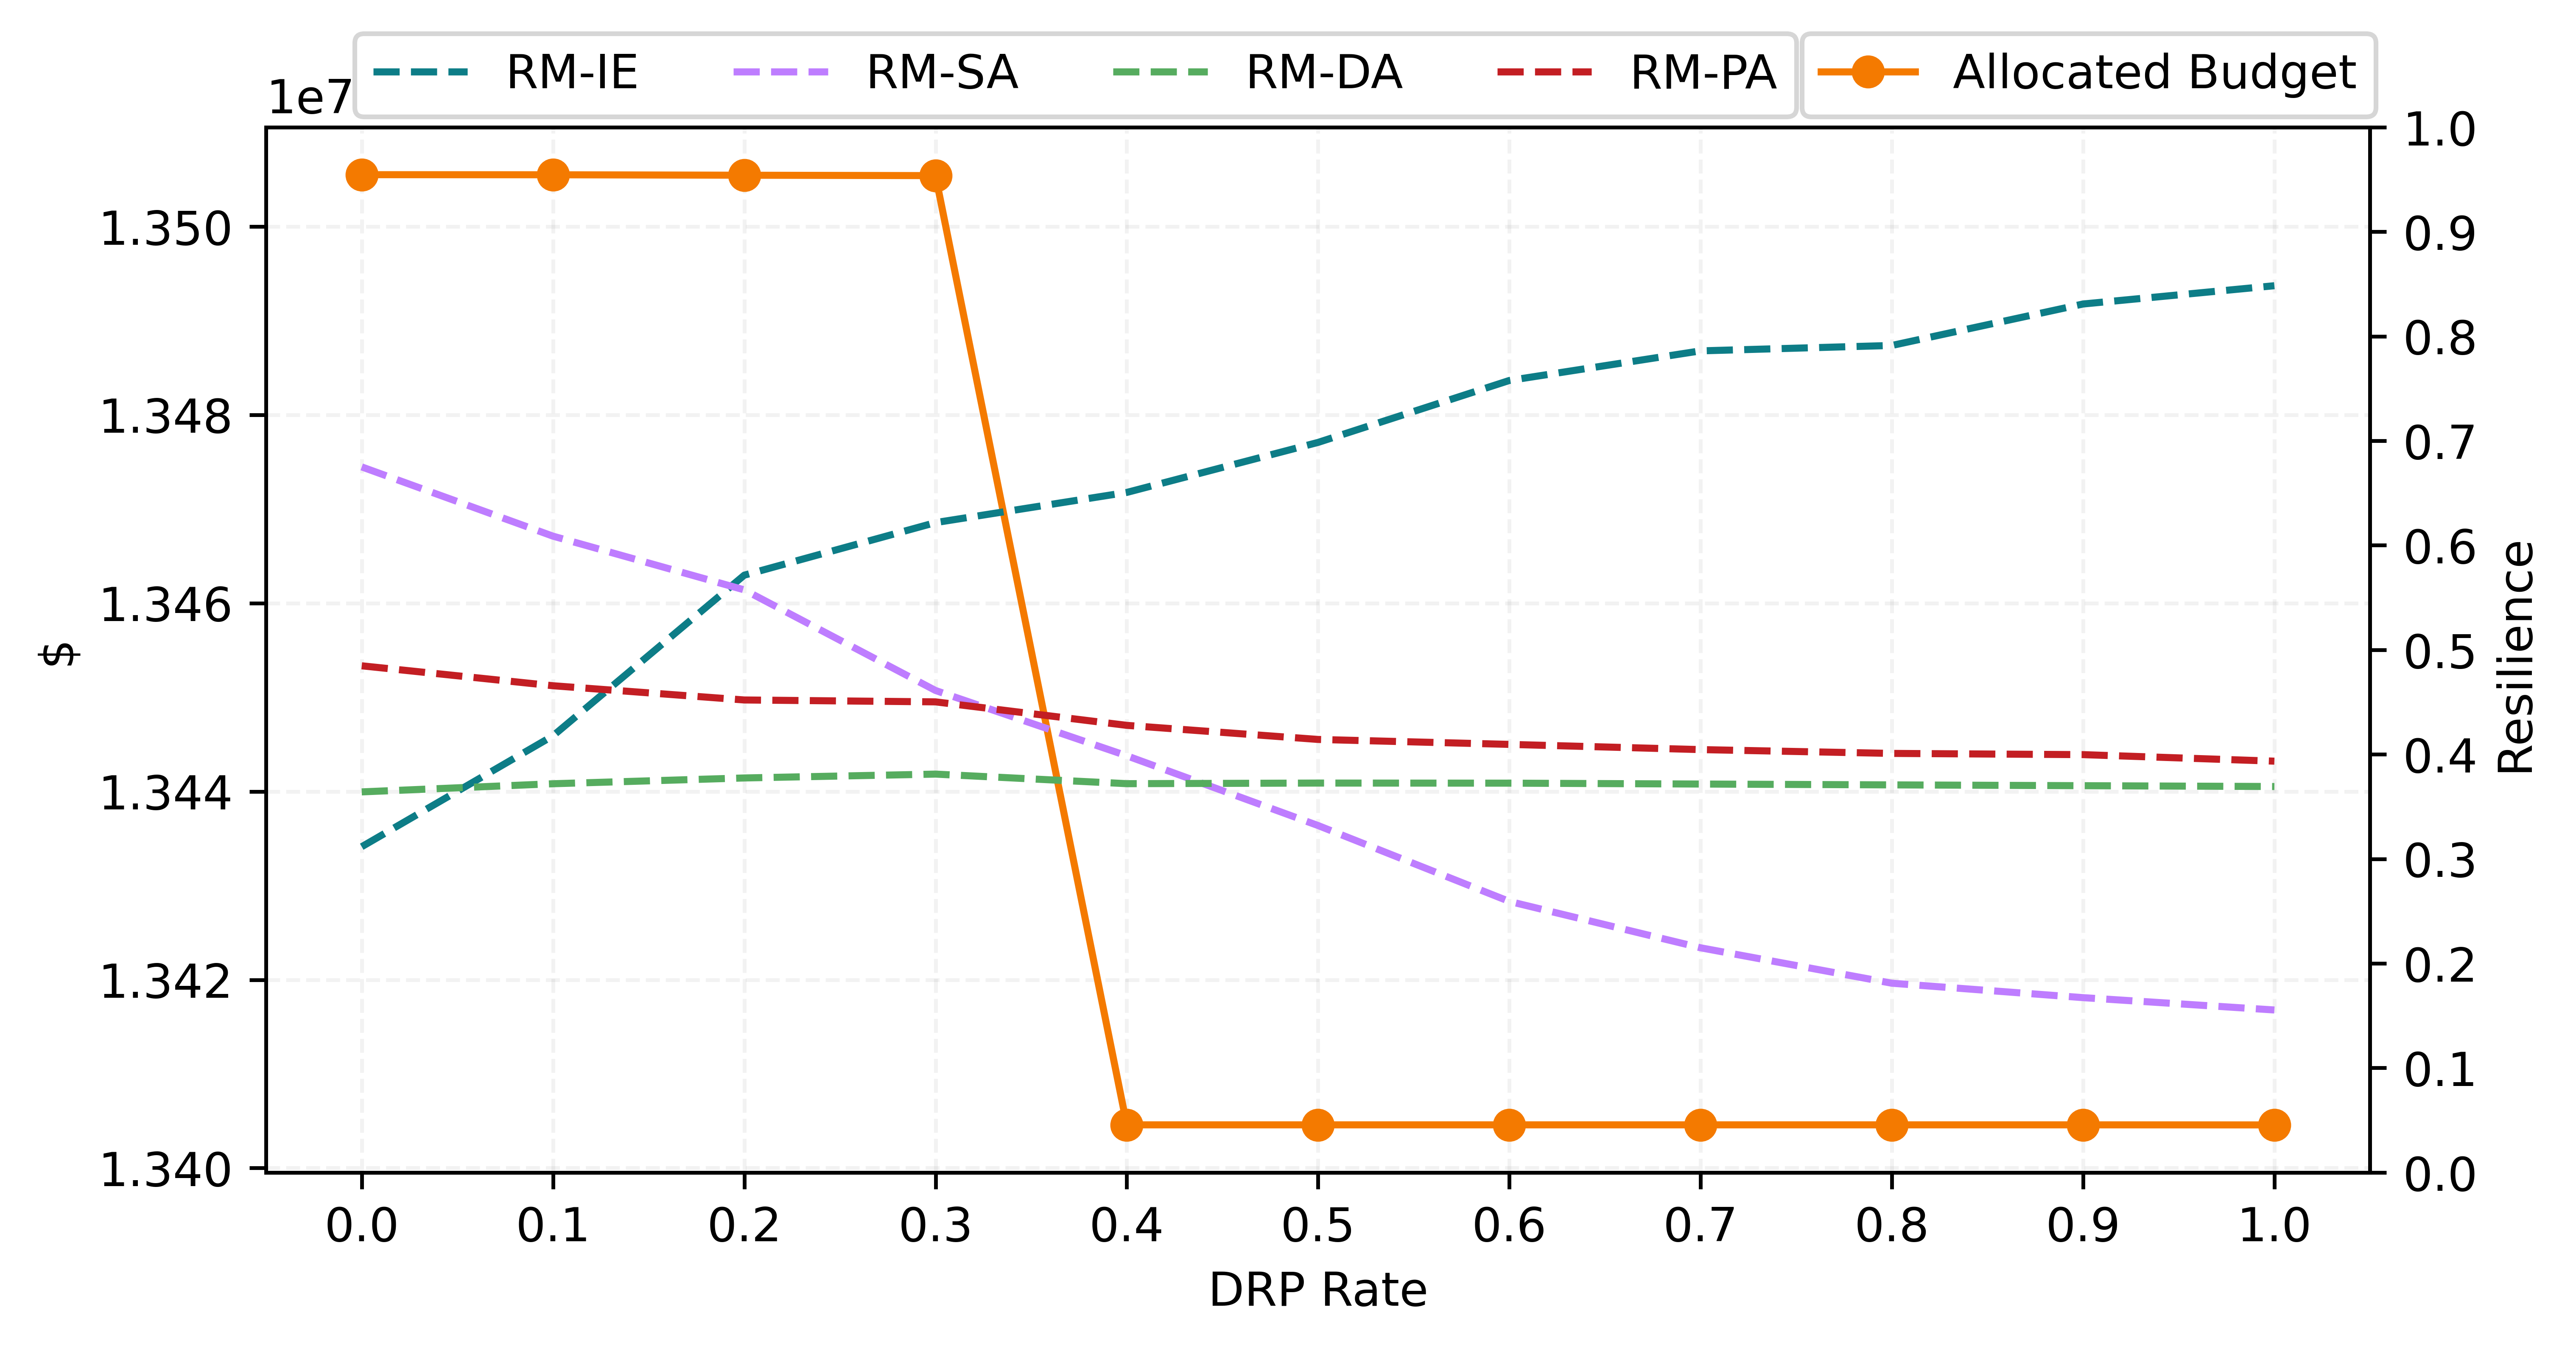

In [106]:
mask = tm
_inv = np.add(data[mask]['Investment'] , data[mask]['Reinvestment'])
_rng = data[mask]['Value']
_res = [data[mask][RM1], data[mask][RM2], data[mask][RM3], data[mask][RM4]]
fig1 = plt.figure(figsize=(8, 4), dpi=800)
plt.plot(_rng, _inv, c=_c[0], marker='o', label='Allocated Budget')
plt.ylabel('$')
plt.xlabel('DRP Rate')
plt.xticks([0+0.1*i for i in range(11)], rotation=0)
plt.legend(loc=(0.73,1.01))
plt.grid(color='gray', linestyle='--', alpha=0.1)

ax1 = plt.twinx()
ax1.plot(_rng, _res[0], c=_c[1], label='RM-IE', linestyle='--')
ax1.plot(_rng, _res[1], c=_c[2], label='RM-SA', linestyle='--')
ax1.plot(_rng, _res[2], c=_c[3], label='RM-DA', linestyle='--')
ax1.plot(_rng, _res[3], c=_c[5], label='RM-PA', linestyle='--')
#ax1.plot(_rng, 0.25*(np.add(_res[0], _res[1])+np.add(_res[2],_res[3])), c='black', linestyle=':', alpha=0.8)
ax1.set_ylim([0, 1])
ax1.set_yticks([i*0.1 for i in range(11)])
ax1.set_ylabel('Resilience ')
ax1.legend(loc=[0.042, 1.01], ncol=4)

plt.savefig(f'../IMG/Inv vs DRP {com}.jpg', bbox_inches='tight')

In [99]:
_rng

1     0.0
2     0.1
3     0.2
4     0.3
5     0.4
6     0.5
7     0.6
8     0.7
9     0.8
10    0.9
11    1.0
Name: Value, dtype: float64

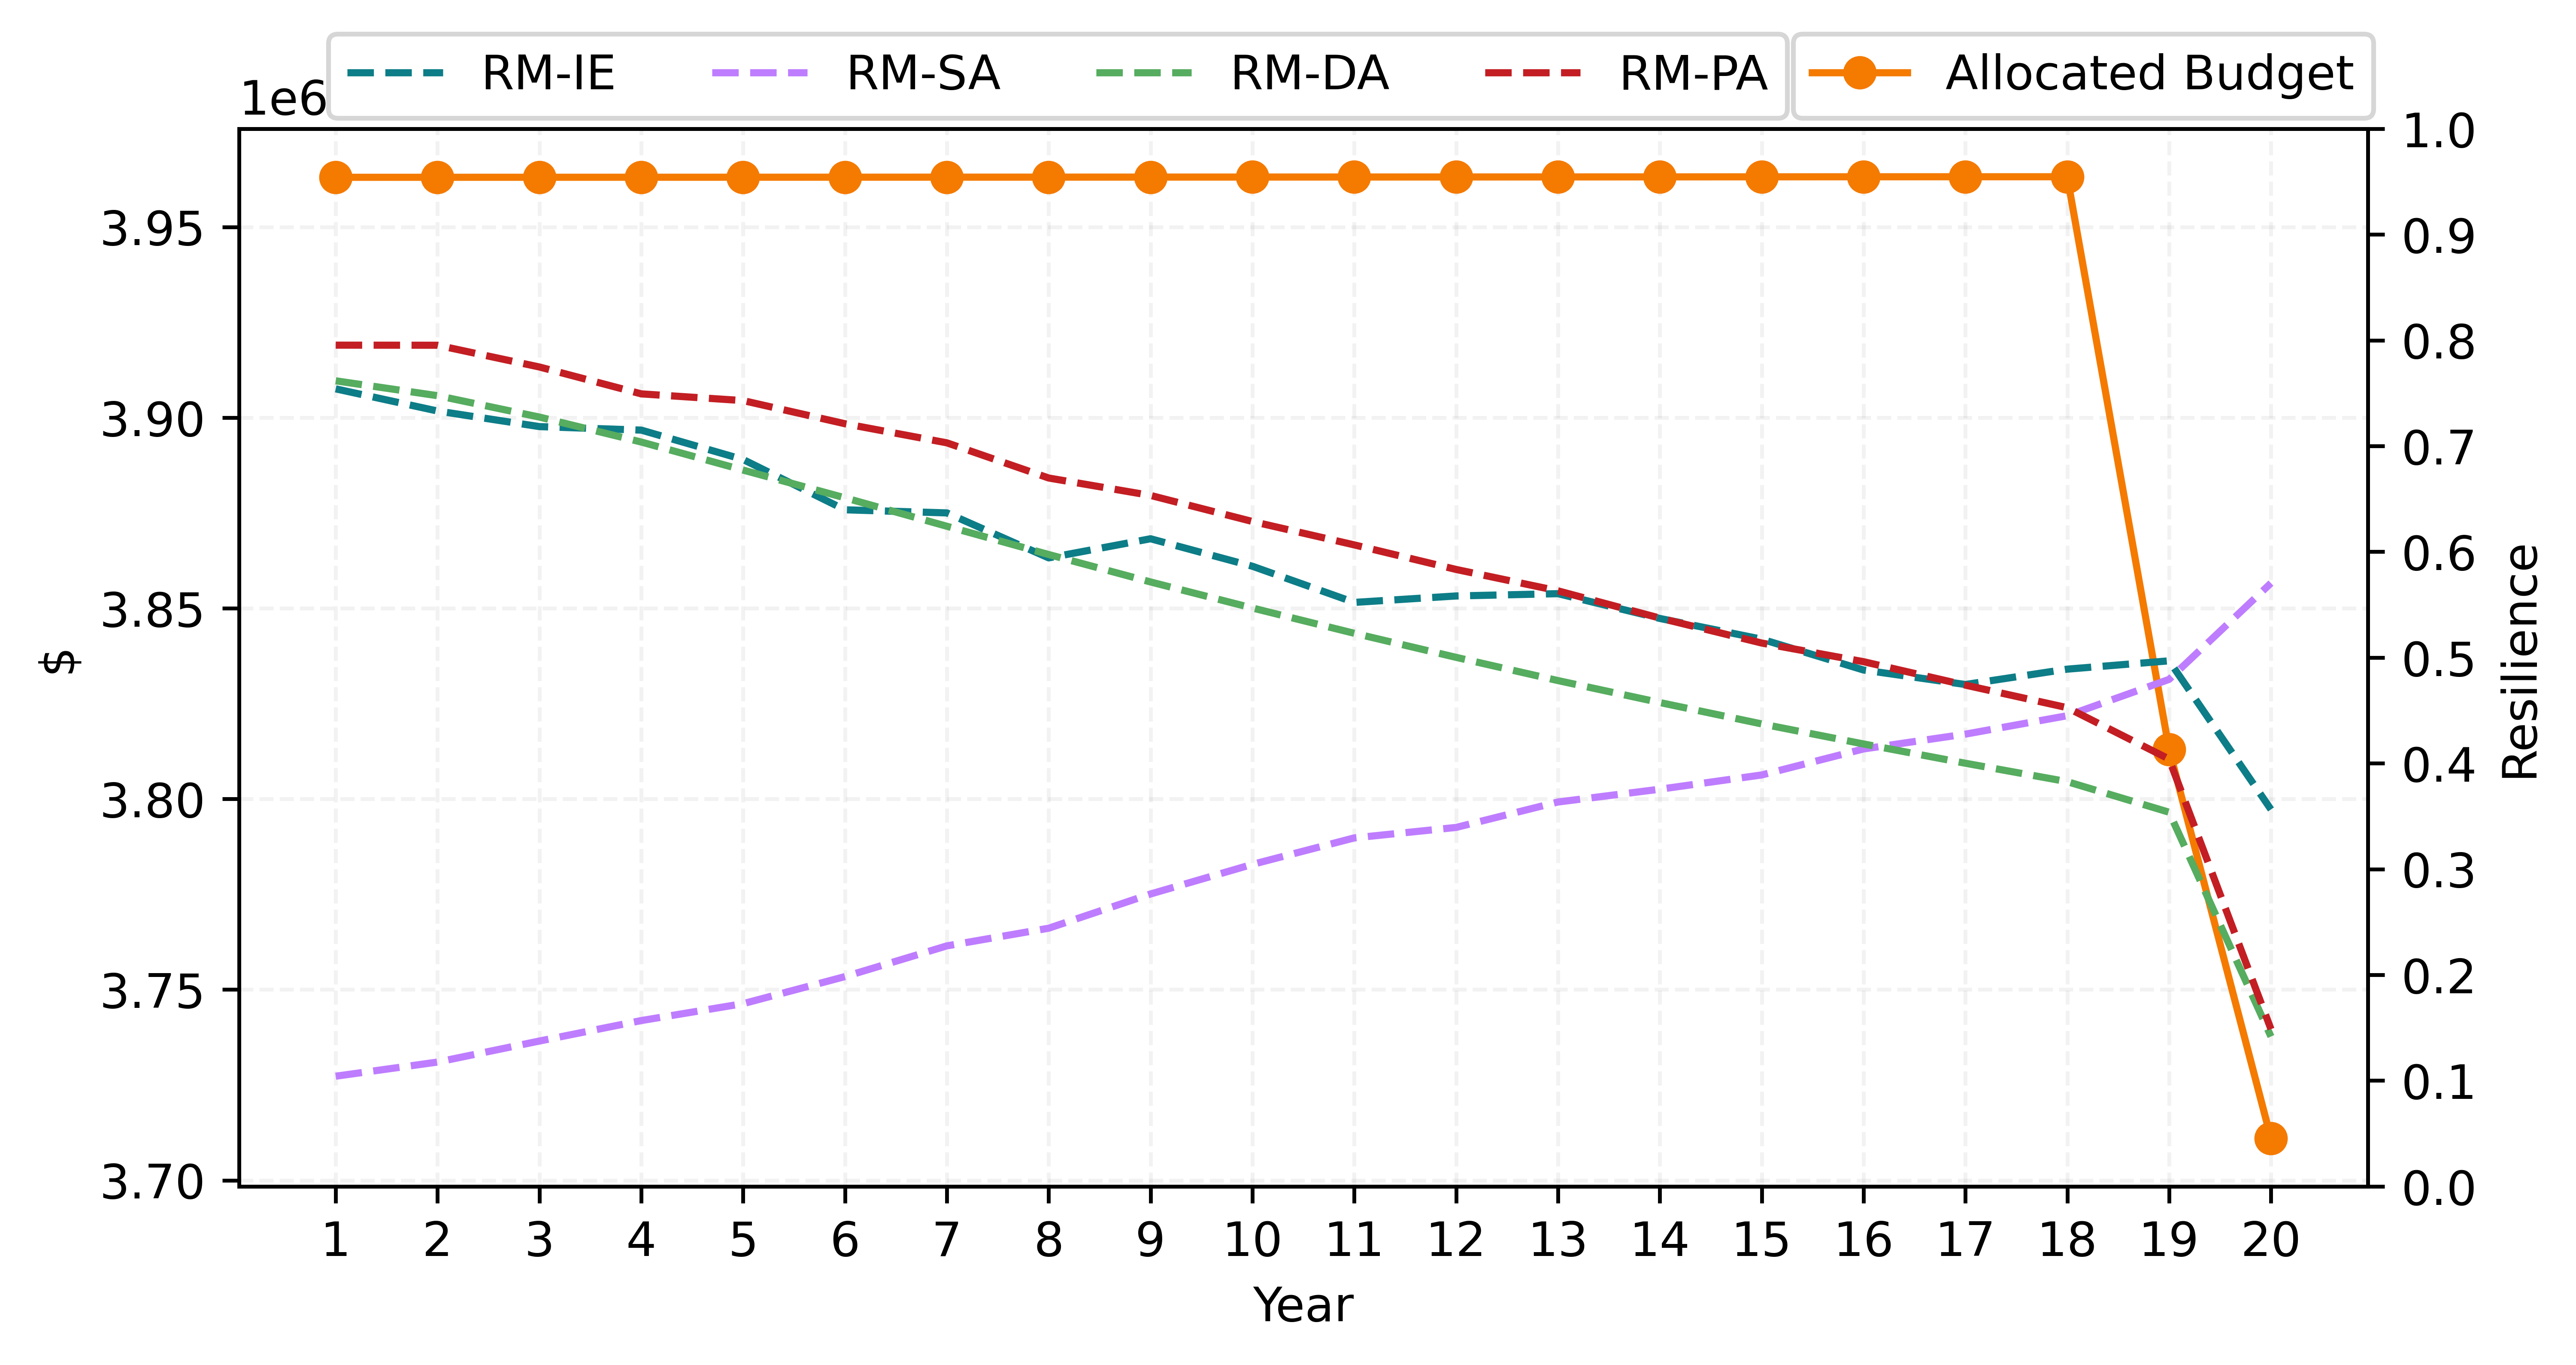

In [109]:
mask = ty
_inv = np.add(data[mask]['Investment'] , data[mask]['Reinvestment'])
_rng = data[mask]['Value']
_res = [data[mask][RM1], data[mask][RM2], data[mask][RM3], data[mask][RM4]]
fig1 = plt.figure(figsize=(8, 4), dpi=800)
plt.plot(_rng, _inv, c=_c[0], marker='o', label='Allocated Budget')
plt.ylabel('$')
plt.xlabel('Year')
plt.xticks(range(1, 21), rotation=0)
plt.legend(loc=(0.73,1.01))
plt.grid(color='gray', linestyle='--', alpha=0.1)

ax1 = plt.twinx()
ax1.plot(_rng, _res[0], c=_c[1], label='RM-IE', linestyle='--')
ax1.plot(_rng, _res[1], c=_c[2], label='RM-SA', linestyle='--')
ax1.plot(_rng, _res[2], c=_c[3], label='RM-DA', linestyle='--')
ax1.plot(_rng, _res[3], c=_c[5], label='RM-PA', linestyle='--')
#ax1.plot(_rng, 0.25*(np.add(_res[0], _res[1])+np.add(_res[2],_res[3])), c='black', linestyle=':', alpha=0.8)
ax1.set_ylim([0, 1])
ax1.set_yticks([i*0.1 for i in range(11)])
ax1.set_ylabel('Resilience')
ax1.legend(loc=[0.042, 1.01], ncol=4)

plt.savefig(f'../IMG/Inv vs Year {com}.jpg', bbox_inches='tight')

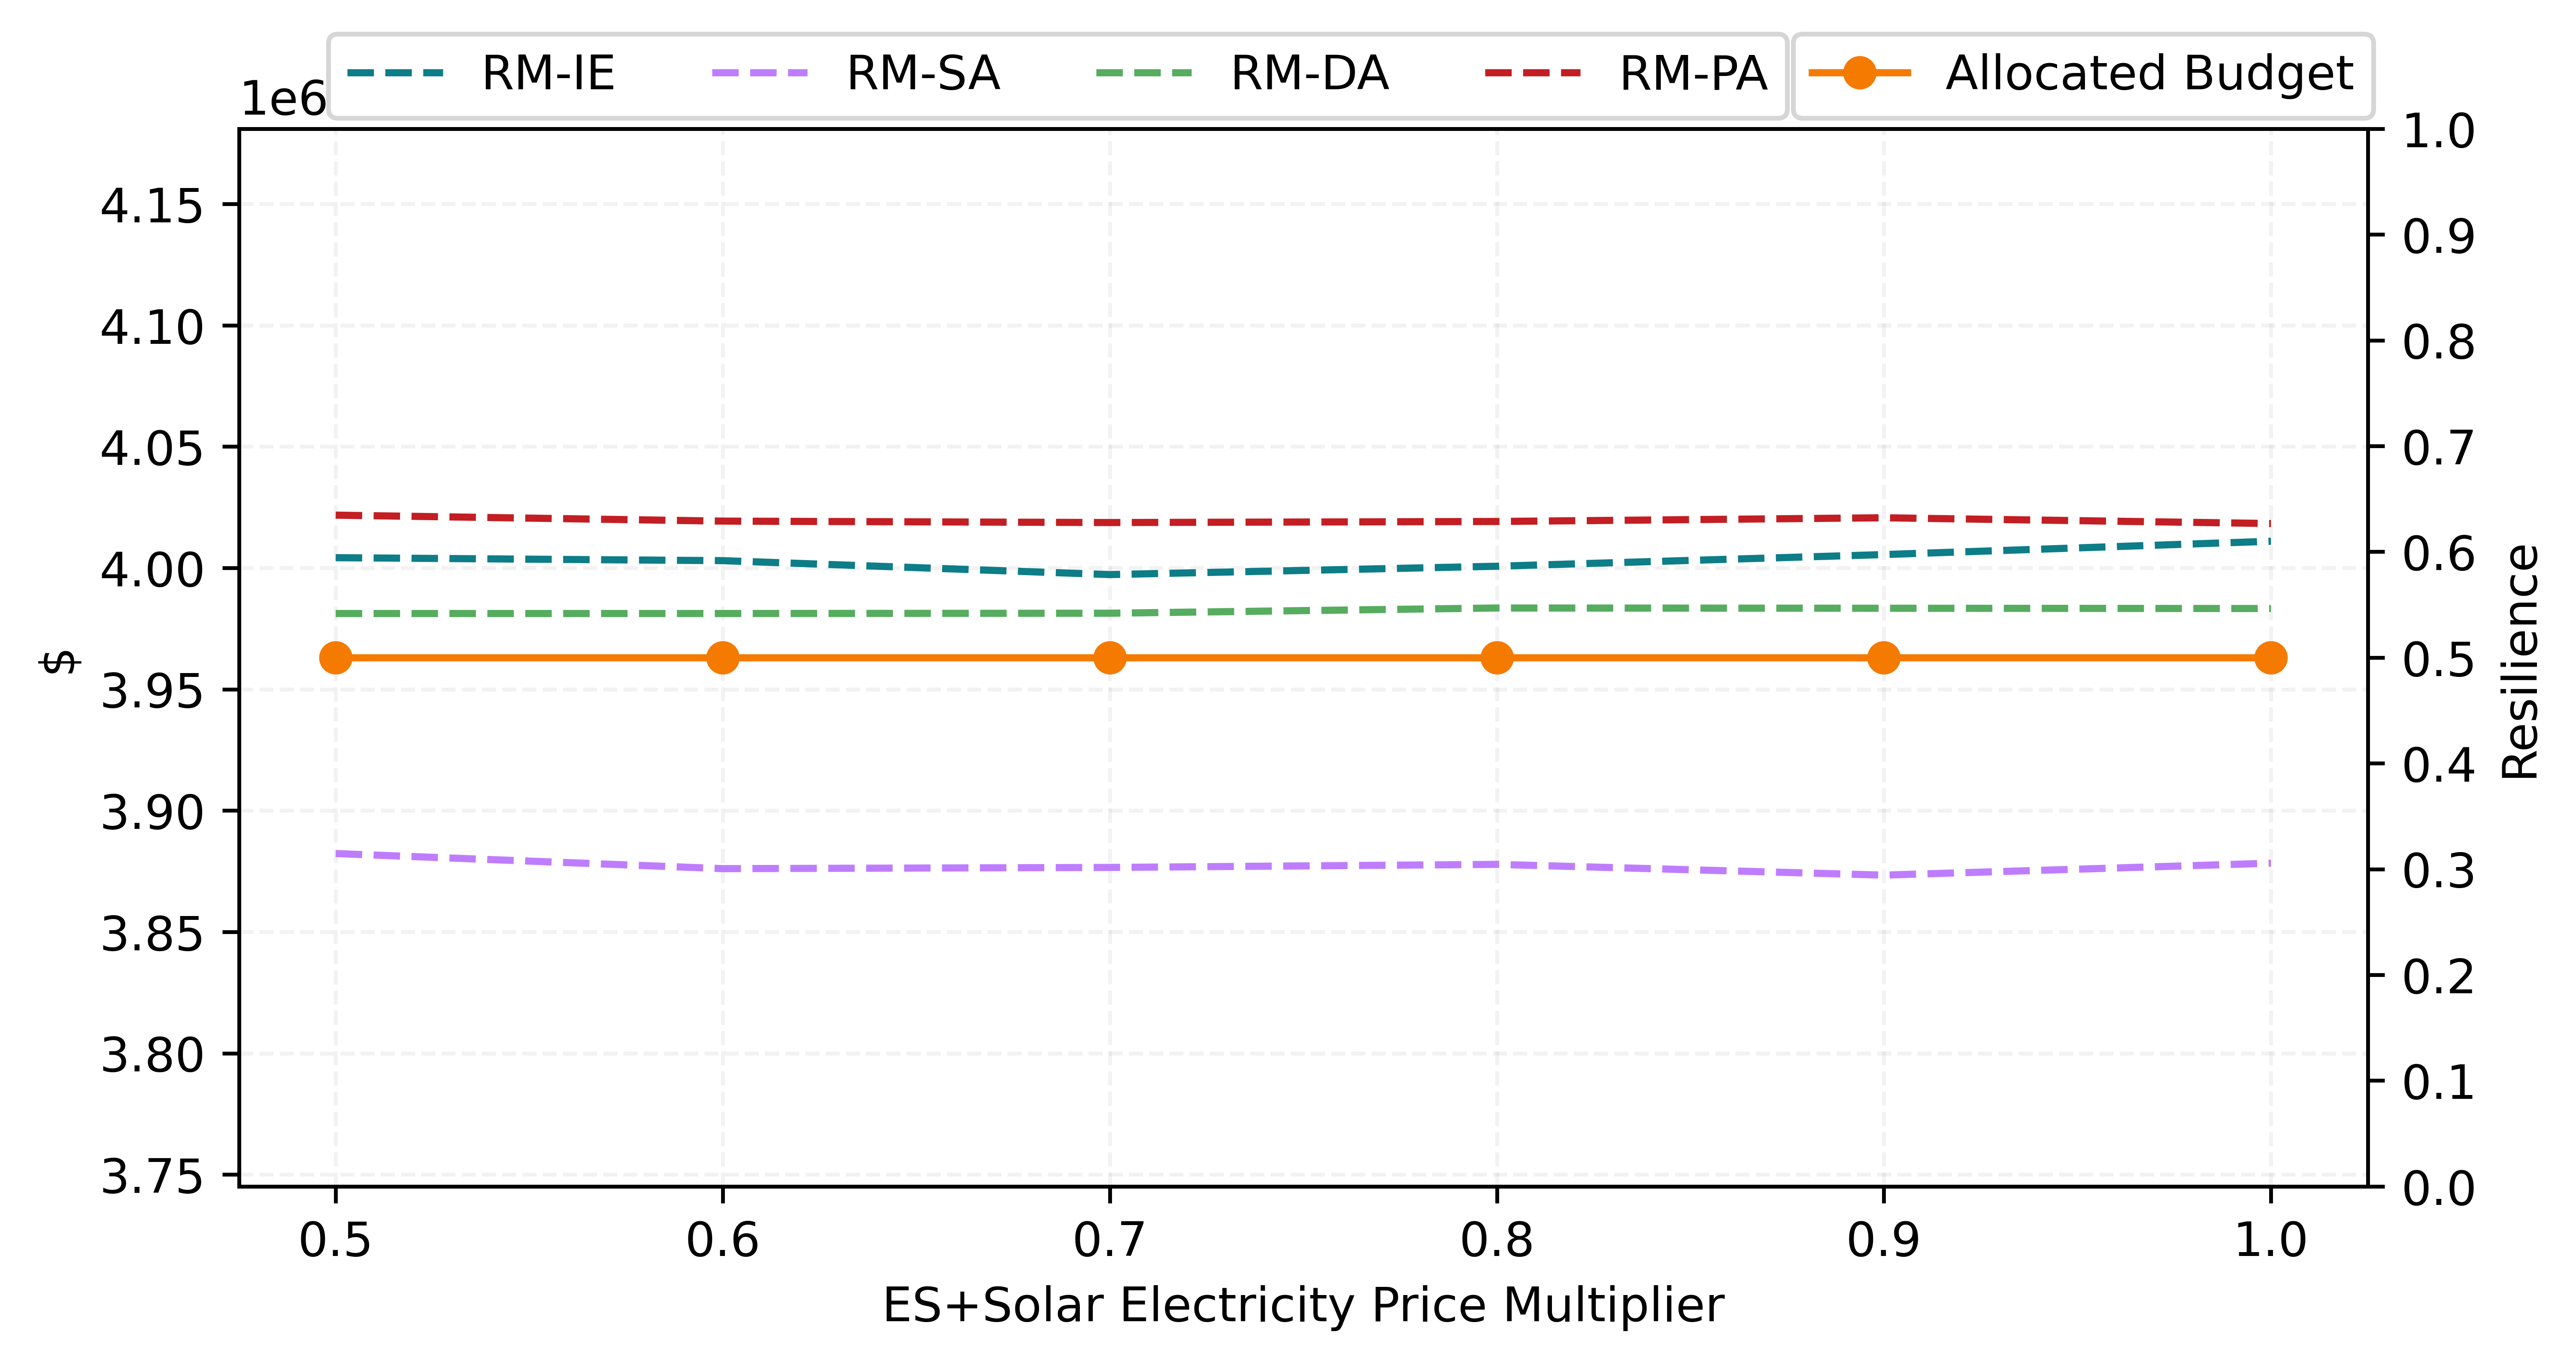

In [78]:
mask = em
_inv = np.add(data[mask]['Investment'] , data[mask]['Reinvestment'])
_rng = data[mask]['Value']
_res = [data[mask][RM1], data[mask][RM2], data[mask][RM3], data[mask][RM4]]
fig1 = plt.figure(figsize=(8, 4), dpi=800)
plt.plot(_rng, _inv, c=_c[0], marker='o', label='Allocated Budget')
plt.ylabel('$')
plt.xlabel('ES+Solar Electricity Price Multiplier')
plt.xticks([0+0.1*i for i in range(11)], rotation=0)
plt.legend(loc=(0.73,1.01))
plt.grid(color='gray', linestyle='--', alpha=0.1)

ax1 = plt.twinx()
ax1.plot(_rng, _res[0], c=_c[1], label='RM-IE', linestyle='--')
ax1.plot(_rng, _res[1], c=_c[2], label='RM-SA', linestyle='--')
ax1.plot(_rng, _res[2], c=_c[3], label='RM-DA', linestyle='--')
ax1.plot(_rng, _res[3], c=_c[5], label='RM-PA', linestyle='--')
ax1.set_ylim([0, 1])
ax1.set_yticks([i*0.1 for i in range(11)])
ax1.set_ylabel('Resilience')
ax1.legend(loc=[0.042, 1.01], ncol=4)

plt.savefig(f'../IMG/Inv vs Eprice {com}.jpg', bbox_inches='tight')

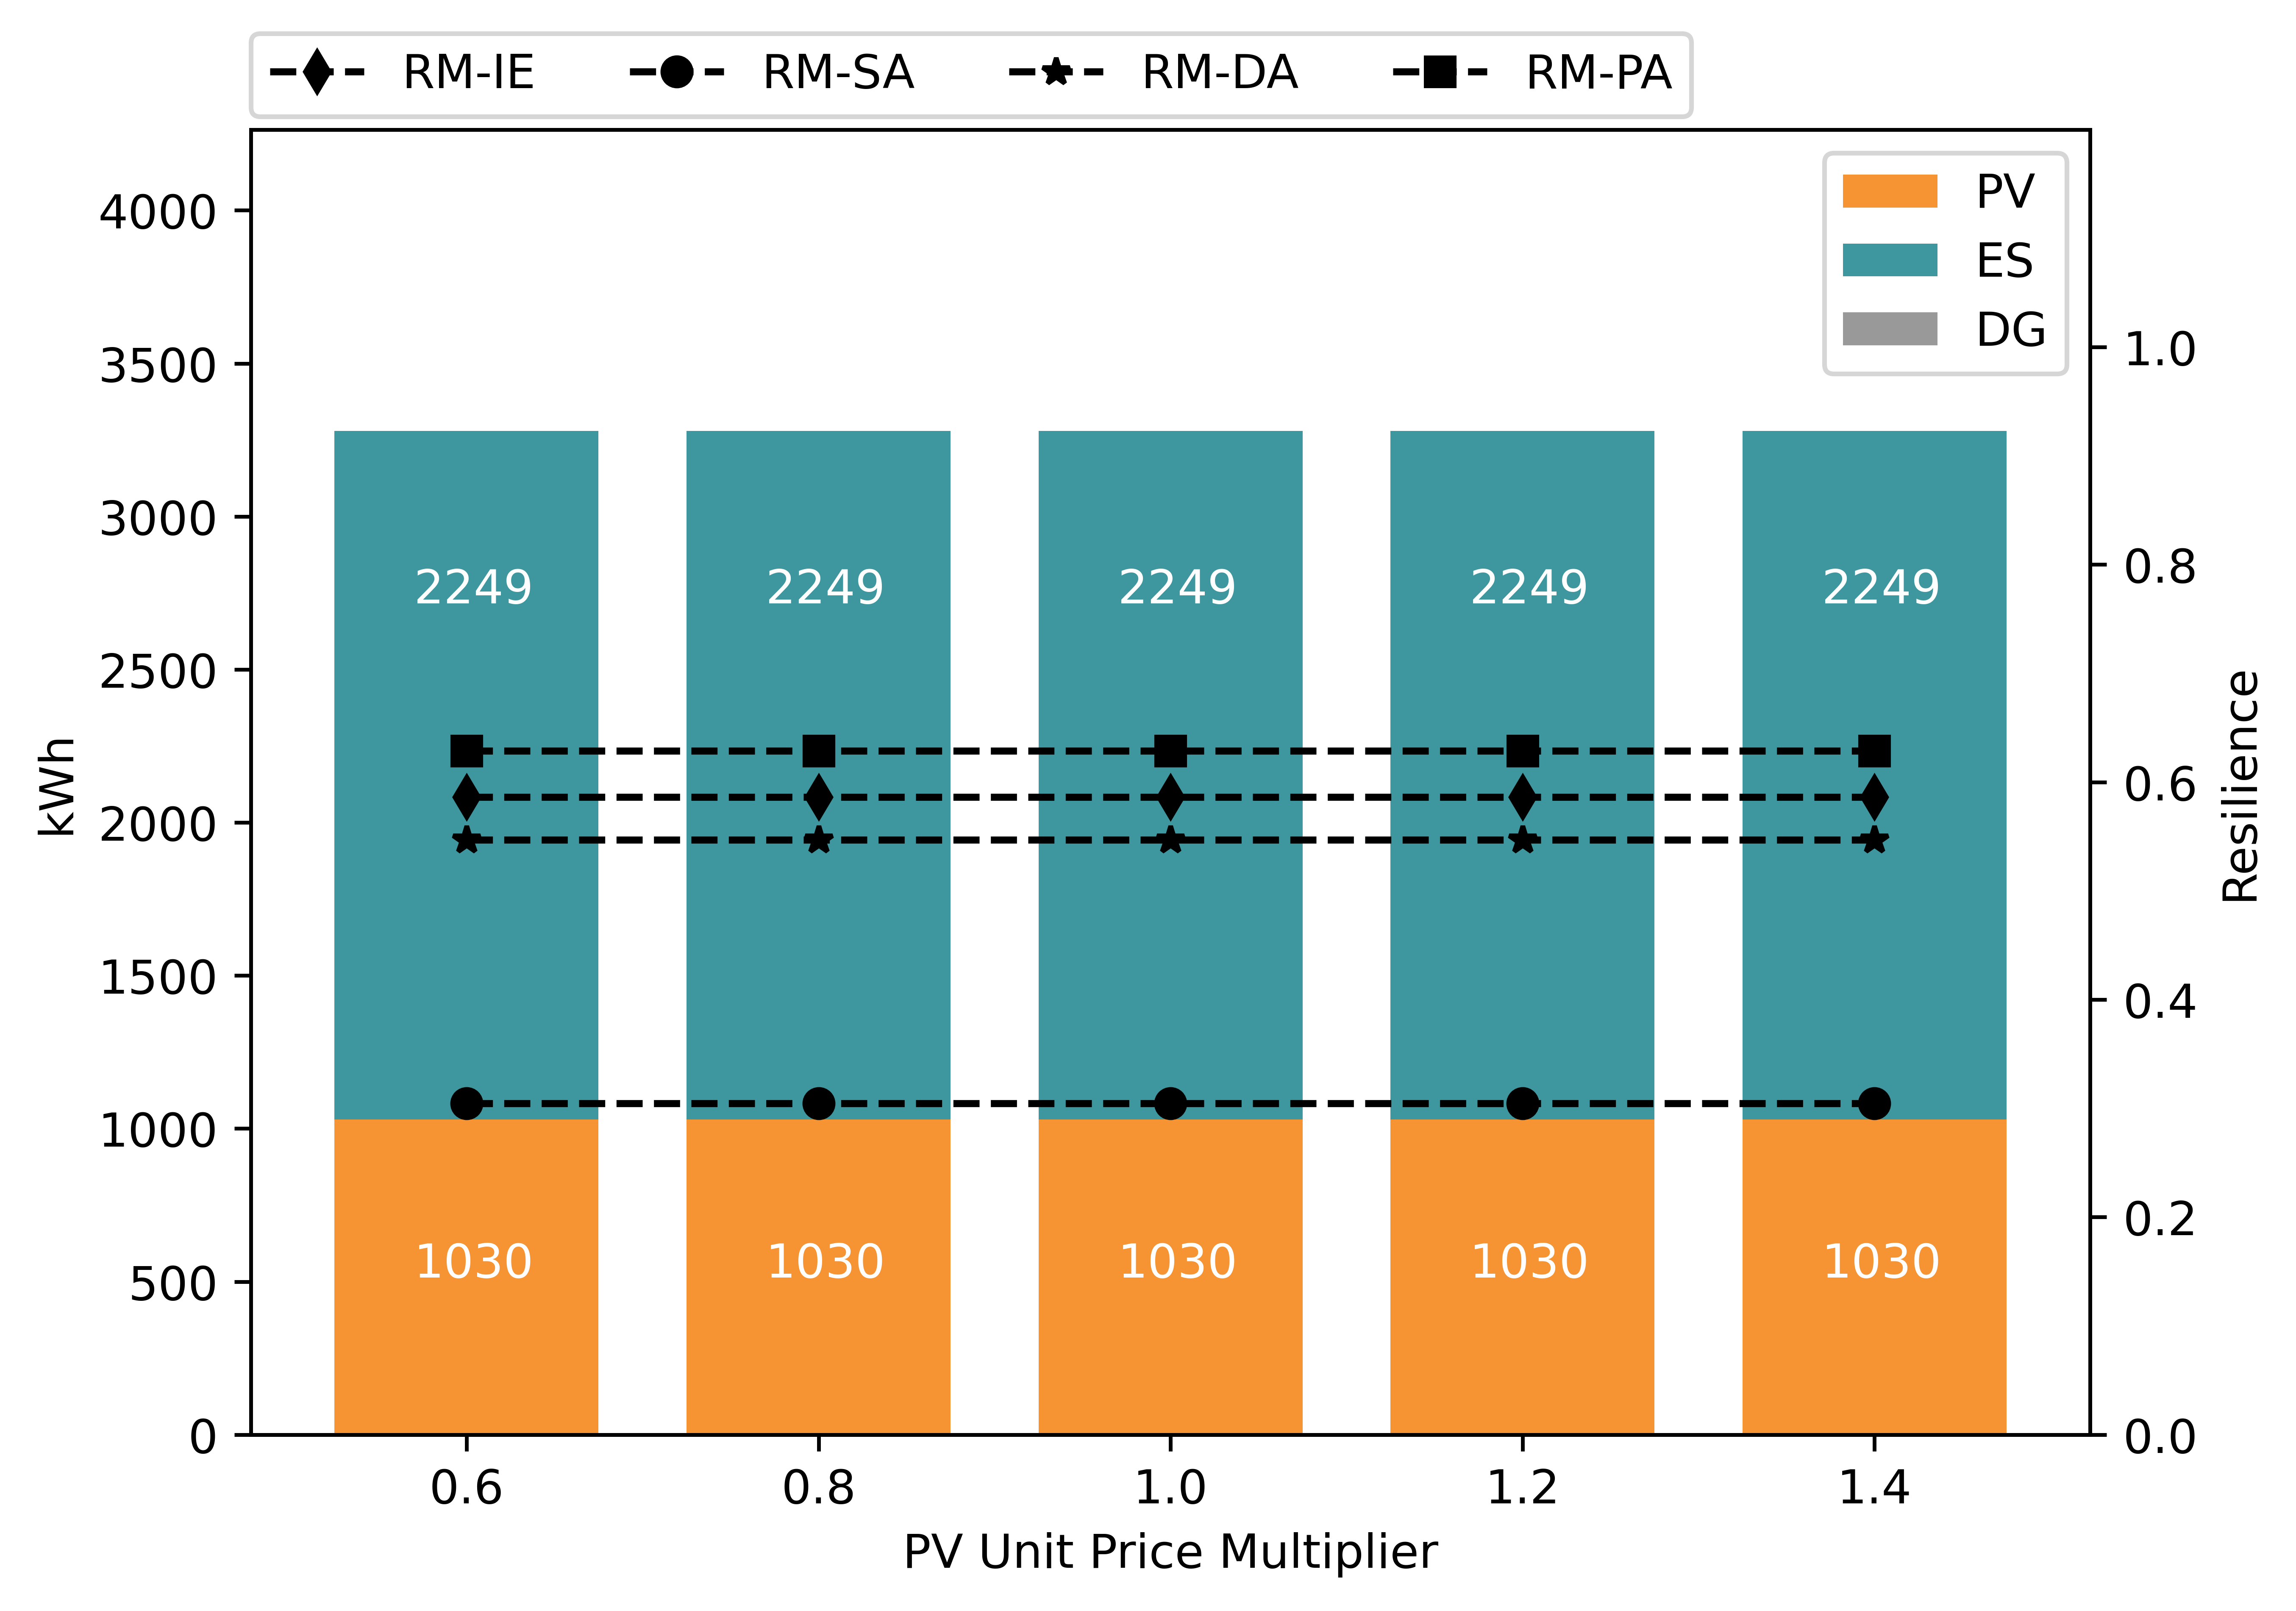

In [84]:
_PV = list(data[pvm]['PV1'] + data[pvm]['PV2'])
_ES = list(data[pvm]['ES1'] + data[pvm]['ES2'])
_DG = list(data[pvm]['DG1'] + data[pvm]['DG2'])
_rng = list(data[pvm]['Value'])

fig = plt.figure(figsize=(7, 5), dpi=800)
plt.bar(_rng, _PV, width=0.15, align='center', color=_c[0], label='PV', alpha=0.8)
plt.bar(_rng, _ES, bottom=_PV, width=0.15, align='center', color=_c[1], label='ES', alpha=0.8)
plt.bar(_rng, _DG, width=0.15, align='center', color=_c[7], label='DG', alpha=0.8)
plt.ylabel('kWh')
plt.xlabel('PV Unit Price Multiplier')
plt.ylim([0, 1.3*max(map(add, _PV, _ES))])
plt.legend()
for bar,i in zip(_rng, range(len(_rng))):
    plt.text(x=bar-0.03, y=_PV[i]/2, s=str(int(_PV[i])), color='white')
    plt.text(x=bar-0.03, y=_ES[i]*(0.75)+_PV[i], s=str(int(_ES[i])), color='white')
    
    
ax = plt.twinx()
ax.plot(_rng, data[pvm][RM1], c='black', marker='d', linestyle='--', label='RM-IE')
ax.plot(_rng, data[pvm][RM2],  c='black', marker='o', linestyle='--', label='RM-SA')
ax.plot(_rng, data[pvm][RM3],  c='black', marker='*', linestyle='--', label='RM-DA')
ax.plot(_rng, data[pvm][RM4],  c='black', marker='s', linestyle='--', label='RM-PA')
ax.set_ylim([0,1.2])
ax.set_ylabel('Resilience')
ax.set_yticks([0,0.2,0.4,0.6,0.8, 1])
ax.legend(loc=[0, 1.01], ncol=4)
plt.savefig(f'../IMG/Device Sensitivity-{com}', bbox_inches='tight')

In [36]:
def make_radar_chart(stats, x_range, param, color):
    fig = plt.figure(figsize=(15, 4), dpi=400)
    labels = [f'RM{superscript_text("rob")}', f'RM{superscript_text("Red")}', f'RM{superscript_text("Res")}']
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) # generate angles
    angles = [(a + np.deg2rad(30)) % (2 * np.pi) for a in angles]
    angle = np.concatenate((angles,[angles[0]]))
    label =np.concatenate((labels,[labels[0]]))
    for i in range(len(x_range)):
        ax = fig.add_subplot(int(f'14{i+1}'), polar=True)
        stat = np.concatenate((stats[i],[stats[i][0]]))
        ax.plot(angle, stat, 'o-', linewidth=2, color=c[color], alpha=0.5)
        ax.fill(angle, stat, color=c[color], alpha=0.4)
        ax.set_thetagrids(angle * 180/np.pi, label)
        plt.ylim([0, 1.1])
        plt.yticks([0.2, 0.4, 0.6, 0.8])
        if param != 'Year':
            ax.set_title(f'{gamma_symbol}{superscript_text(param)}: {x[i]}')
        else:
            ax.set_title(f'm: {x_range[i]}')
        ax.grid(True)
    plt.savefig(f'../IMG/{type} {com}-Resilience Sensitivity-{param}.jpg', bbox_inches='tight')
    

"make_radar_chart(stats=[[data[bm]['Robustness'].iloc[i], data[bm]['Redundancy'].iloc[i],\tdata[bm]['Resourcefulness'].iloc[i]]\n                        for i in range(len(data[bm]))],\n                        x_range=data[bm]['Value'].values,\n                        param='Budget', color=1)\nmake_radar_chart(stats=[[data[vm]['Robustness'].iloc[i], data[vm]['Redundancy'].iloc[i], data[vm]['Resourcefulness'].iloc[i]]\n                        for i in range(len(data[vm]))],\n                        x_range=data[vm]['Value'].values,\n                        param='VoLL', color=2)\nmake_radar_chart(stats=[[data[tm]['Robustness'].iloc[i], data[tm]['Redundancy'].iloc[i], data[tm]['Resourcefulness'].iloc[i]]\n                        for i in range(len(data[tm]))],\n                        x_range=data[tm]['Value'].values,\n                        param='Trans', color=3)\nmake_radar_chart(stats=[[data[ty]['Robustness'].iloc[i], data[ty]['Redundancy'].iloc[i], data[ty]['Resourcefulness'].iloc[

In [7]:
def Sensitivity(tables, params=None):
    plt.figure(figsize=(15, 9), dpi=300)
    for i in range(len(tables)):
        plt.subplot(2, 2, i+1)
        cols, color_i = tables[i].columns, 0
        y_max = 0
        for j in cols[1:]:
            plt.plot(tables[i][cols[0]], tables[i][j], marker='d', c=c[color_i], label=j)
            if y_max < int(np.max(tables[i][j].values)/1000000)+1:
                y_max = int(np.max(tables[i][j].values)/1000000)+1
            color_i+= 1
        split = {7: 21, 10: 19, 5: 18,4:17, 3:16, 2:11, 1:11}
        plt.xticks(tables[i][cols[0]])
        plt.yticks(np.linspace(0, y_max*1e6, split[y_max]), [f'{j:0.2f}M' for j in np.linspace(0, y_max, split[y_max])])
        plt.xlabel(f'{gamma_symbol}{superscript_text(params[i])}')
        plt.ylabel('Budget Spent ($)')
        plt.grid(True, which='both', color=c[-1], alpha=0.3)
        plt.legend()
    plt.savefig(f'../IMG/{type} {com}-Sensitivity_InvRein.jpg', bbox_inches='tight')

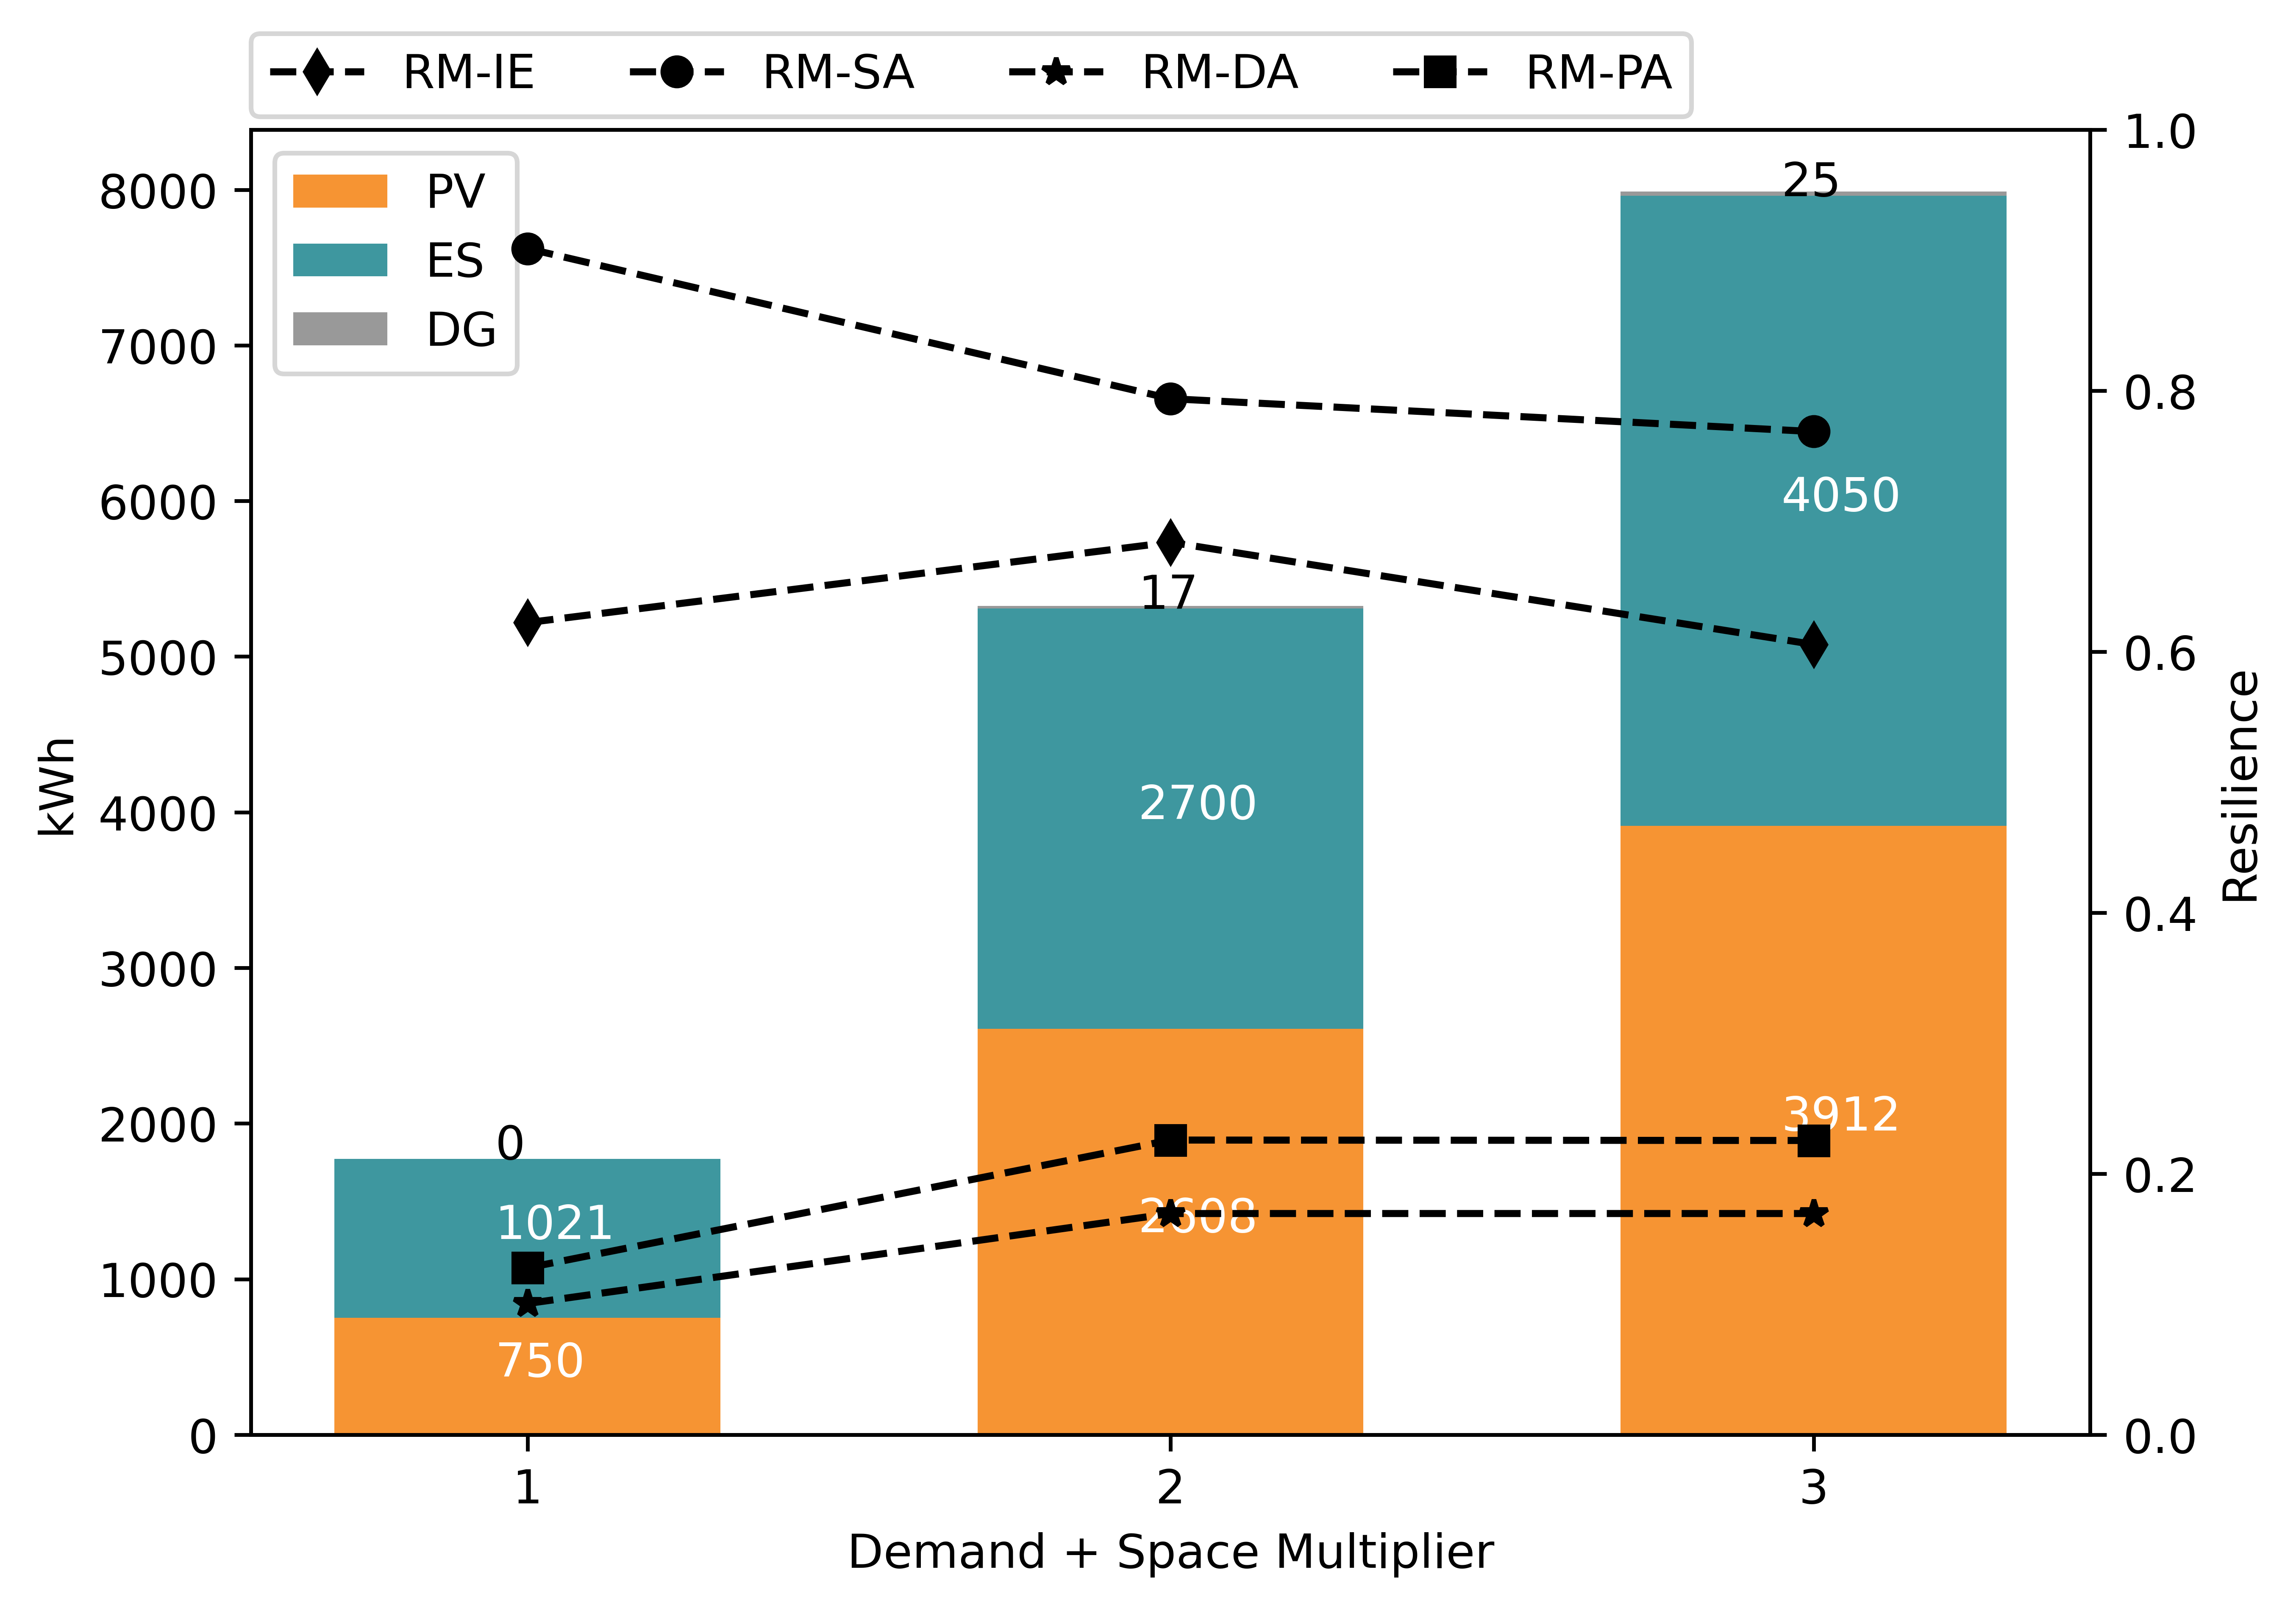

In [141]:
case2 = [pd.read_csv('ES-PV-DRP Case 2 - Dove Springs.csv'), pd.read_csv('ES-PV-DRP Case 2 - Sunnyside.csv'), pd.read_csv('ES-PV-DRP Case 2 - Rogers Washington.csv')]
k = 2
d = case2[k]
rng = [1, 2, 3]
PV = np.add(d['PV1'], d['PV2'])
ES = np.add(d['ES1'], d['ES2'])
DG = np.add(d['DG1'], d['DG2'])
res = [d[RM1], d[RM2], d[RM3], d[RM4]]

PV_g = [(PV[1]-PV[0])/PV[0], (PV[2]-PV[0])/PV[0]]
ES_g = [(ES[1]-ES[0])/ES[0], (ES[2]-ES[0])/ES[0]]
DG_g = [(DG[1]-DG[0]), (DG[2]-DG[0])]

plt.figure(figsize=(7, 5), dpi=800)
plt.bar(rng, PV, width=0.6, align='center', color=_c[0], label='PV', alpha=0.8)
plt.bar(rng, ES, bottom=PV, width=0.6, align='center', color=_c[1], label='ES', alpha=0.8)
plt.bar(rng, DG, bottom=PV+ES, width=0.6, align='center', color=_c[7], label='DG', alpha=0.8)
plt.xticks(rng)
plt.xlabel('Demand + Space Multiplier')
plt.ylabel('kWh')
plt.legend()
for bar,i in zip(rng, range(3)):
    plt.text(x=bar-0.05, y=PV[i]/2, s=str(int(PV[i])), color='white')
    plt.text(x=bar-0.05, y=ES[i]/2+PV[i], s=str(int(ES[i])), color='white')
    plt.text(x=bar-0.05, y=PV[i]+ES[i], s=str(int(DG[i])), color='black')

ax = plt.twinx()
ax.plot(rng, res[0], c='black', label='RM-IE', linestyle = '--', marker='d')
ax.plot(rng, res[1], c='black', label='RM-SA', linestyle='--', marker='o')
ax.plot(rng, res[2], c='black', label='RM-DA', linestyle='--', marker='*')
ax.plot(rng, res[3], c='black', label='RM-PA', linestyle='--', marker='s')
ax.legend()
ax.set_ylim([0,1])
ax.set_ylabel('Resilience')
ax.legend(loc=[0, 1.01], ncol=4)
plt.savefig(f'../IMG/{com_names[k]}-Case2.jpg', bbox_inches='tight')

In [125]:
DG[1]

17